## We will now start to explore the notebook, how to use it, and then run the housing demo

You can get into the notebook from the project page in two ways
1. Clicking on the name of the notebook - this takes you into Browse mode (use the pen icon to go into edit mode). If you do not see the File, Edit, View Insert, Cell, Kernel & Help menu items, you are in Brose mode.
2. Clicking on the pen icon on the right which takes you into Edit mode

By default the Comments pane appears on the right. This can be closed by hitting the [X]


In [2]:
!pip install earth

Requirement not upgraded as not directly required: earth in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: numpy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from earth)


In [5]:
!pip install --upgrade Pillow

Requirement already up-to-date: Pillow in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages


At the top right you will see a series of icons 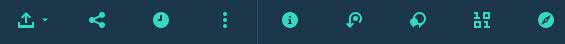
These represent: Integration with GitHub, share your notebook with others via a url link showing a range of notebook content, schedule your notebook to run either as a one off of at regular interval, More (to insert project tokens), Notebook Info, Versioning to enable up to 10 versions of a notebook, Comments, Find and Add data and Find Resources.
You might want to have a lok at these options to help your knowledge.

Top left there are menu items associated with editing and running the notebook. These were described in the word document, but for this demo we need to be aware of  how to run a cell, stop the run, and recycling the Kernel. 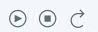

When we open a notebook the associated Spark service gets started in the background. Spark gets called each run we run a cell via the Triangle or other cell running options under the Cell menu pull down.

Some cells will do declarative work whilst others cause Spark to process data, and can take longer to execute. You will notive that on this free service, some take up to 1 minute in a couple of cases.

You will also see some information showing the version of python we are running, the version of Spark, and a circle. The notebook we imported told DSX what versions to use based on the settings we had when we exported it. When Spark is executing something the circle turns solid showing the Kernel is busy. You will also notice the cell numbers to the left of the cell turn to an * when that cell is running, or is queued to be run.

### Thats some background, now lets get on with the demo


The first time you run the notebook you might need to install packages.  There are a range of packages already installed, but the flexibility of a notebook means you can extend its capability by adding or upgrading packages based on what you want to use.

The !pip commend is used to add or upgrade a package. 
We want to use sklearn and folium packages, so lets upgrade from the standard version.  We only need todo this the first time we run the notebook.

Run the cell below using the 'play' triangle to install and upgrade packages used in this notebook. You can put a '#' in front of them afterwards to stop having to reinstall ach time we run the notebook.

In [8]:

!pip install --upgrade folium

Requirement already up-to-date: folium in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: jinja2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: branca>=0.3.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: numpy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: MarkupSafe>=0.23 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from jinja2->folium)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda

### Re-Start the Kernel after a package upgrade - Go to Kernel > Restart to do so - Only needed on first time

It is good practive to re-start the kernel after a package have been update.


## House Prices in Madrid - Example of how DSX Can be used to Predict house prices in Madrid


## Notebooks read like a book - Containing code or commentary

A Cell can be run with shift-enter, or press "play" logo on upper bar
A line starting with # (a hash or pound if you are American) mean that line is a comment and does not get executed.

In [9]:
import math
variable_a = 8 * 2
variable_b = math.sqrt(variable_a)

The above cell did a calculation but did not print the result! You can use Print(variablename)

In [10]:
# We can do maths in cells 
variable_c = variable_a + variable_b
print(variable_c)

20.0


In [11]:
# Even multiplications !
fries = 250
coke = 180

calories = 2 * fries + coke

print('Two fries and a coke is this many calories ->', calories)

Two fries and a coke is this many calories -> 680


We can use packages to do things for us. In this case generate 10 numbers in the range 1 to 6. 
You can see that just specifying the variable nam by itself also prints its contents

In [12]:
import numpy as np

random_numbers = np.random.randint(1,6,100)
random_numbers

array([2, 5, 3, 1, 3, 2, 2, 2, 3, 3, 3, 1, 5, 5, 3, 2, 2, 1, 4, 2, 4, 1, 5,
       4, 1, 2, 5, 2, 3, 2, 4, 1, 4, 2, 5, 4, 1, 4, 5, 2, 4, 1, 2, 1, 4, 3,
       1, 3, 5, 5, 4, 1, 1, 3, 3, 1, 1, 2, 3, 1, 4, 2, 3, 1, 4, 3, 3, 1, 3,
       5, 1, 5, 1, 1, 5, 3, 4, 1, 2, 1, 5, 3, 2, 4, 5, 5, 4, 2, 4, 5, 4, 5,
       5, 5, 1, 2, 1, 1, 3, 5])

###  Install a package is a 1-liner

geopy is an example of a package we want to use, so we need to install it.  If it is already installed, it will tell us.

In [13]:
print("Install a package")
!pip install geopy

Install a package
Requirement not upgraded as not directly required: geopy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages


We are now going to look at our prepared data.

### Loading the Data in DSX, is a simple click based exercise - This is Unique for DSX

Once all Data sources are defined in the Project Details, any data source can be added with 1 click.
Put your cursor in the cell below between the 'insert code here' comment lines
1. Use the Find & Add Data icon that looks like biary in the top right 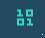
2. Click on Connections
3. Locate MadridHousingData
4. Use the twistie to select "Insert to code"
5. Insert pandas DataFrame (Consider a dataframe like a workbook in Excel!)
6. Select your DASHxxxx schema
7. Select HOUSING table from the drop down
8. Insert Code
This used your Connection to Db2 Warehouse on Cloud, user id, password etc, to get a list of schemas and tables you can see. It then generated a code to access the table and store its data as a dataframe. The name of the data frame takes a forms data_df_n where n is a number that goes up each time you generate code.

The generated code reads the table and populates the dataframe. It also shows the top five rows via the head() function.
Dont worry if it takes a few seconds to reach out to the other Bluemix service, read over 10000 rows and store them in memory within spark.

ad_id     price  region_level2_id      lat      lng  \
0  141537319.0  550000.0              28.0  40.4040 -3.69258   
1  141129777.0   84999.0              28.0  40.4212 -3.61754   
2  141321296.0  159999.0              28.0  40.4226 -3.64750   
3  142917234.0  515000.0              28.0  40.4429 -3.71124   
4  141506865.0  115000.0              28.0  40.3796 -3.73910   

           create_date property property_state  district_id   mts2  \
0  22/02/2017 13:15:54     Flat       VeryGood        671.0  178.0   
1  17/01/2017 19:37:03     Flat            NaN        676.0   60.0   
2  02/02/2017 18:53:29     Flat            NaN        685.0   67.0   
3   15/06/2017 7:43:11     Flat           Good        177.0  139.0   
4  20/02/2017 13:00:42     Flat            NaN        171.0   56.0   

          ...          pista-tenis sauna  piscina-comunitaria  \
0         ...                    0     0                    0   
1         ...                    0     0                    0   
2         ...                    0     0                    0   
3         ...                    0     0                    0   
4         ...                    0     0                    0   

   puerta-blindada  terraza lavadora  serv-porteria  zona-infantil  \
0                0        1        0              1              0   
1                0        0        0              0              0   
2                0        0        0              0              0   
3                0        0        0              0              0   
4                1        0        0              0              0   

   cocina-office parking-comunitario  
0              0                   0  
1              0                   0  
2              0                   0  
3              0                   0  
4              0                   0  

[5 rows x 92 columns]

Good developers use varibale names that mean something. Rather than editing the above code, lets copy the dataframe to one called madrid_data and look at the last 5 rows.  
We saw the first row above was labelled with record number 0, which increases by line, so the last row will tell us how many records in the data frame.

In [16]:
# copy the data from the database table (now held in dataframe) to a data frame with appropriate name
madrid_data = df_data_7
# Look at the bottom of the data frame
madrid_data.tail(3)

ad_id     price  region_level2_id      lat      lng  \
19031  138824651.0       NaN              28.0  40.4907 -3.62553   
19032  141384284.0  310000.0              28.0  40.4042 -3.67808   
19033  142622042.0  280000.0              28.0  40.4062 -3.71859   

               create_date property      property_state  district_id   mts2  \
19031  21/06/2017 11:53:50     Flat                 NaN        678.0    NaN   
19032  08/02/2017 13:49:12     Flat           AlmostNew        199.0  107.0   
19033  23/05/2017 11:55:12     Flat  ToMakeImprovements        671.0   78.0   

              ...          pista-tenis sauna  piscina-comunitaria  \
19031         ...                    0     0                    0   
19032         ...                    0     0                    1   
19033         ...                    0     0                    0   

       puerta-blindada  terraza lavadora  serv-porteria  zona-infantil  \
19031                0        1        0              0              0   
19032                1        0        0              0              0   
19033                1        0        1              0              0   

       cocina-office parking-comunitario  
19031              0                   0  
19032              0                   0  
19033              0                   0  

[3 rows x 92 columns]

You can see that the 'record or row number column on the left is 10774, but we started at zero, so thats 10775 records!

### The data is automatically loaded in a Pandas Dataframe - Pandas is a very popular python package to work with data

https://pandas.pydata.org/pandas-docs/stable/dsintro.html and https://pandas.pydata.org/pandas-docs/stable/10min.html


As experienced professionals we have some expectations about quality and size so lets only include properties larger than a shoe box that are prices higher than a basement garage!

We will populate madrid_with_price only with properties where price is >30,000 euro, and properties > 30 square metres.

In [17]:
madrid_with_price = madrid_data[ (madrid_data["price"] > 30.000) & (madrid_data["mts2"] > 30.0) ]
madrid_with_price.head()

ad_id     price  region_level2_id      lat      lng  \
0  141537319.0  550000.0              28.0  40.4040 -3.69258   
1  141129777.0   84999.0              28.0  40.4212 -3.61754   
2  141321296.0  159999.0              28.0  40.4226 -3.64750   
3  142917234.0  515000.0              28.0  40.4429 -3.71124   
4  141506865.0  115000.0              28.0  40.3796 -3.73910   

           create_date property property_state  district_id   mts2  \
0  22/02/2017 13:15:54     Flat       VeryGood        671.0  178.0   
1  17/01/2017 19:37:03     Flat            NaN        676.0   60.0   
2  02/02/2017 18:53:29     Flat            NaN        685.0   67.0   
3   15/06/2017 7:43:11     Flat           Good        177.0  139.0   
4  20/02/2017 13:00:42     Flat            NaN        171.0   56.0   

          ...          pista-tenis sauna  piscina-comunitaria  \
0         ...                    0     0                    0   
1         ...                    0     0                    0   
2         ...                    0     0                    0   
3         ...                    0     0                    0   
4         ...                    0     0                    0   

   puerta-blindada  terraza lavadora  serv-porteria  zona-infantil  \
0                0        1        0              1              0   
1                0        0        0              0              0   
2                0        0        0              0              0   
3                0        0        0              0              0   
4                1        0        0              0              0   

   cocina-office parking-comunitario  
0              0                   0  
1              0                   0  
2              0                   0  
3              0                   0  
4              0                   0  

[5 rows x 92 columns]

You can see the result was 5 rows with 91 columns, but we can only see a number of columns on the screen.
Now only show 10 columns

In [18]:
madrid_with_price[madrid_with_price.columns[:10]].head()

ad_id     price  region_level2_id      lat      lng  \
0  141537319.0  550000.0              28.0  40.4040 -3.69258   
1  141129777.0   84999.0              28.0  40.4212 -3.61754   
2  141321296.0  159999.0              28.0  40.4226 -3.64750   
3  142917234.0  515000.0              28.0  40.4429 -3.71124   
4  141506865.0  115000.0              28.0  40.3796 -3.73910   

           create_date property property_state  district_id   mts2  
0  22/02/2017 13:15:54     Flat       VeryGood        671.0  178.0  
1  17/01/2017 19:37:03     Flat            NaN        676.0   60.0  
2  02/02/2017 18:53:29     Flat            NaN        685.0   67.0  
3   15/06/2017 7:43:11     Flat           Good        177.0  139.0  
4  20/02/2017 13:00:42     Flat            NaN        171.0   56.0

Now show columns 10 to 20. We could equally do 20 to 30, etc... or tail(nn)

In [19]:
madrid_with_price[madrid_with_price.columns[10:20]].head(3)

ad_publisher_type_id           county  rooms  water_id  heating_id  \
0                   1.0  Madrid, Zona de    4.0       1.0         1.0   
1                   1.0  Madrid, Zona de    3.0       0.0         0.0   
2                   1.0  Madrid, Zona de    3.0       0.0         0.0   

        district  postal_code  property_state_id  county_id country  
0     Arganzuela      28045.0                2.0      173.0  España  
1       San Blas      28037.0                0.0      173.0  España  
2  Ciudad Lineal      28017.0                0.0      173.0  España

If we just want to see a list of all columns in a dataframe we can use list(madrid_with_price) or madrid_with_price.columns.tolist()

This helps us to identify columns we might be interested in. 

In [20]:
list(madrid_with_price)

['ad_id',
 'price',
 'region_level2_id',
 'lat',
 'lng',
 'create_date',
 'property',
 'property_state',
 'district_id',
 'mts2',
 'ad_publisher_type_id',
 'county',
 'rooms',
 'water_id',
 'heating_id',
 'district',
 'postal_code',
 'property_state_id',
 'county_id',
 'country',
 'street',
 'region_level1',
 'neighbourhood',
 'city_zone',
 'property_id',
 'region_level1_id',
 'list_type',
 'city',
 'host_name',
 'publish_date',
 'transaction',
 'price_min',
 'company',
 'search_results_number',
 'more_filters',
 'sell_type_id',
 'ad_title',
 'neighbourhood_id',
 'region_level2',
 'bathrooms',
 'city_zone_id',
 'property_sub',
 'site',
 'videoportero',
 'ascensor',
 'bodega',
 'patio',
 'casa-de-invitados',
 'horno',
 'bano-huespedes',
 'amueblado',
 'z-comunitaria',
 'gimnasio',
 'alarma',
 'piscina',
 'cuarto-servicio',
 'ascensor-interior',
 'garaje-privado',
 'trastero',
 'cuarto-lavado-plancha',
 'aire-acondicionado',
 'parquet',
 'porche-cubierto',
 'jacuzzi',
 'suite-bano',
 'do

Alternatively look at a condensed list of the columns available to analyse within this dataset

In [21]:
print("Wrapped column list: ")
for column in madrid_with_price.columns:
    print(column, end=", ")
# note the print command allowing us to inject a comma into the results

Wrapped column list: 
ad_id, price, region_level2_id, lat, lng, create_date, property, property_state, district_id, mts2, ad_publisher_type_id, county, rooms, water_id, heating_id, district, postal_code, property_state_id, county_id, country, street, region_level1, neighbourhood, city_zone, property_id, region_level1_id, list_type, city, host_name, publish_date, transaction, price_min, company, search_results_number, more_filters, sell_type_id, ad_title, neighbourhood_id, region_level2, bathrooms, city_zone_id, property_sub, site, videoportero, ascensor, bodega, patio, casa-de-invitados, horno, bano-huespedes, amueblado, z-comunitaria, gimnasio, alarma, piscina, cuarto-servicio, ascensor-interior, garaje-privado, trastero, cuarto-lavado-plancha, aire-acondicionado, parquet, porche-cubierto, jacuzzi, suite-bano, domotica, musica-ambiental, muebles-diseno, energia-solar, calefaccion, sala-cine, gres-ceramica, microondas, TV, lavadero, jardin-privado, internet, electrodomesticos, armarios

Now we have a data frame containing data, lets explore the data

In [22]:
# how many houses are available
print("A total of ", madrid_with_price.count()[0], " houses are available in the data set.")


A total of  16163  houses are available in the data set.


In [23]:
madrid_with_price.head()
madrid_with_price.to_csv("madrid_for_gbs.csv", index=False)

In [24]:
client_01fa29576c1949bf8bf19f9e93a1ba4a.upload_file("madrid_for_gbs.csv",Bucket='madriddemocosv25a2f52851fe4426398727dbd657012ea',Key='madrid_for_gbs.csv' )

### Pandas is very flexible with Column Selection, head(N) is used to select the first N rows

In [25]:
madrid_with_price[["price", "district"]].head(5)

price       district
0  550000.0     Arganzuela
1   84999.0       San Blas
2  159999.0  Ciudad Lineal
3  515000.0       Chamberí
4  115000.0    Carabanchel

## The power of DSX - Use any Open-source package to get the job done...
### like Folium - We installed it at the top of the notebook.

Folium (Leaflet) is a very nice geo data vizualisation tool - Use the !pip install [package] code to install

https://folium.readthedocs.io/en/latest/

https://github.com/python-visualization/folium


Using folium, and the coordinates for Cybele Palace as an indicator for the centre of Madrid, lets look at the density of houses for sale on a map.

In less than 10 lines of code, we have in interactive heatmap, showing the popular places where houses are for sale.

In [ ]:
import folium

cybele_palace = (40.418906, -3.692084)

lat_lng_list = list( zip( list(madrid_with_price.lat), list(madrid_with_price.lng) ) )
house_density = [ (lat,lng,0.3) for (lat,lng) in lat_lng_list ]
centre_madrid = cybele_palace

from folium.plugins import HeatMap

map_with_houses = folium.Map(centre_madrid, tiles='stamentoner', zoom_start=11)

HeatMap(house_density).add_to(map_with_houses)
map_with_houses

We can see a heat map of where the houses are for sale.

Now lets start applying a little bit of maths on our data to see what we can discover.

## A Classic Linear Regression on the size of property to predict the price

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Linear Models, as traditional and classic as there are, are still being used. 
In fact, most banking algorithms are still using them 20 years after they first started doing 'clever stuff'.

Db2 Warehouse on Cloud (aka DashDB) is able to run them within the engine with optimized code. 
This can be very fast, but as we progess to more complex models and data manipulations, we need notebooks to have full flexibility.

In the cell below, we use sklearn to build and fit a lineair mode. The DB2 optimezed code is not used in this cell.

In [27]:
# Build a two data frames. square metre on X, and price on y axis
import numpy as np
from sklearn import datasets, linear_model

x = madrid_with_price["mts2"].to_frame()
y = madrid_with_price["price"].to_frame()

In [28]:
x

mts2
0      178.0
1       60.0
2       67.0
3      139.0
4       56.0
5      248.0
6      117.0
7       38.0
8      294.0
9      600.0
10      70.0
11      50.0
13     260.0
14     220.0
15     102.0
16      82.0
17     126.0
18     110.0
19      75.0
21      52.0
22     114.0
23      60.0
25     356.0
26     130.0
27      95.0
28      64.0
29      87.0
30     400.0
31     204.0
32     230.0
...      ...
18994  364.0
18995   90.0
18996  237.0
18997  143.0
18998   90.0
18999  360.0
19000  234.0
19001  476.0
19002  138.0
19005   50.0
19006  110.0
19007   62.0
19008  102.0
19010  113.0
19012   87.0
19013   60.0
19014  110.0
19015  151.0
19016   67.0
19017  101.0
19019  220.0
19023  237.0
19024  204.0
19025  106.0
19026  110.0
19028  110.0
19029   57.0
19030  103.0
19032  107.0
19033   78.0

[16163 rows x 1 columns]

Now use matplotlib and linear regression to plot X and Y data.
The chart will show a shatter plot of prices and square metre together with a line showing the regression prediction. 
You will see we have quite a few 'outliers' that are either huge properties or are very expensive.
We look for outliers either to spot data quality issues, or to spot opportunity!

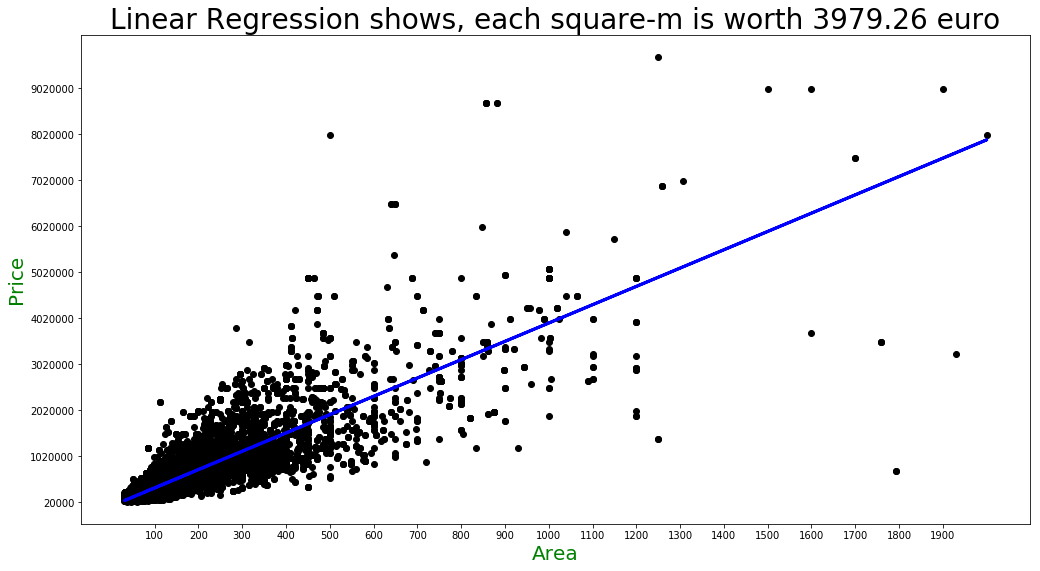

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline  

regr = linear_model.LinearRegression()
regr.fit(x, y)

# plot it as in the example at http://scikit-learn.org/
plt.figure(figsize=(17, 9))
title = "Linear Regression shows, each square-m is worth {0:.2f} euro".format( regr.coef_.flatten()[0] )
plt.title(title, fontsize=28) 
plt.scatter(x.values, y.values,  color='black')
plt.xticks((np.arange(100,2000,100)))
plt.yticks((np.arange(20000,10000000,1000000)))
plt.xlabel('Area', fontsize=20, color='green')
plt.ylabel('Price', fontsize=20, color='green')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)

plt.show()

You can see that the majority of properties available are less than 400 square metre. 

A Trained/Fitted model, contains information like the Coefficients of the model.

Now lets use the linear regression to predict a house price by putting in regr.predict(100.0) 

In [31]:
print( "Intercept: ", regr.intercept_)
print( "Cooef: ", regr.coef_)
print( "")
print("A house of 100 square m, in Madrid, according to the model will cost about:" ,regr.predict(100.0))

Intercept:  [-62147.4561552]
Cooef:  [[ 3979.26384626]]

A house of 100 square m, in Madrid, according to the model will cost about: [[ 335778.92847125]]


As we saw above the coeffient was 3959.6 which is tellign us that the expected price per square metre is 3959.6 Euros.

Thats quite a lot on money, so we had better negotiate our relocation fee well.

### With so many properties available in our recommended area, we need to look at other factors !


### What is the model Performance? How well are we able to predict the price of a property in Madrid ?

### I think a House is well predicted, if the predicted price is less than 5% off from the true price

When working for a Data Project, It is good to use metrics the line of business will understand. 

We can quote lots of mathematics, but fundamentally people want to know how accurate our predictions are going to be. We do this by identifying error rates. The Mean-Squared-Error is a metrics, only a few on the planet have a feeling for.

Lets define a function to derive an error rate based on input values
Then test it based on manually passed values

In [32]:
def percentage_quite_well_predicted( actual_values, predicted_values ):
    actual_values = [ (lambda val: val if val > 0 else 1.0)(val) for val in actual_values ]
    absolute_error = [ abs(val - pred) for (pred,val) in zip(predicted_values, actual_values)]
    relative_differences = [ error/value for (error, value) in zip(absolute_error, actual_values) ]
    treshold = 0.05
    smaller_than_treshold = [ diff < treshold for diff in relative_differences ]
    proportion_within_treshold = sum( smaller_than_treshold ) / float(len(actual_values))
    return( proportion_within_treshold )

percentage_quite_well_predicted( [100,100,100,100,100], [104,104.4,105.5,99,96])

0.8

Using the manually input values, we got a value of 80%

Lets try and estimate the error rate for our housing data. 
We are calling the routine created above with the prices.

In [33]:
preds = regr.predict(x)

percentage_quite_well_predicted(y.price.tolist(),  [ val[0] for val in preds]  )

0.074367382292891165

As you can see, a modest regression on square-m, will predict with an error rate of 7%.

That is, with only the square-m we are able to predict 7% of the houses.

## Feature Engineering - The art of colorizing your data, to reflect phenomenons more prominent

Sometimes, important phenomenons are poorly reflected within the data, making it difficult for the model to make a good prediction. Feature engineering helps re-shaping your data, to make certain aspects of the data more prominent, with the goal to improve the model.

### Distance to Centre is a an important predictor, but only poorly available in the data, lets feature engineer!

The GPS lat, lon, are difficult to use for a model. But we can use them to feature engineer a new column, distance to the centre.

![](http://www.spain.info/export/sites/spaininfo/comun/carrusel-recursos/madrid/puerta-del-sol-madrid-23233868-istock.jpg_369272544.jpg)

With help of geopy, such a calculation is easy to perform

In [34]:
import geopy
from geopy.distance import great_circle

puerta_del_sol = (40.416920, -3.703479)

def distance_to_puerta_del_sol(lat, lng):
    global puerta_del_sol
    return great_circle( (lat,lng), puerta_del_sol ).km

cybele_palace = (40.418906, -3.692084)
print( "The distance (KM) from Cybele Palace, to Puerta del Sol is {0:.2f} KM".format( distance_to_puerta_del_sol(*cybele_palace) ) )

The distance (KM) from Cybele Palace, to Puerta del Sol is 0.99 KM


In [35]:
distance_to_centre_series = madrid_with_price.apply( lambda x : distance_to_puerta_del_sol(x.lat , x.lng) , axis=1)
distance_to_centre_df = distance_to_centre_series.to_frame(name="distance_to_centre")
distance_to_centre_df.head(5)

distance_to_centre
0            1.707948
1            7.292788
2            4.782115
3            2.963425
4            5.131716

In [36]:
distance_to_centre_df.head()

distance_to_centre
0            1.707948
1            7.292788
2            4.782115
3            2.963425
4            5.131716

In [37]:
madrid_with_centre = madrid_with_price.join(distance_to_centre_df)
madrid_with_centre[["ad_id","price","region_level2_id","lat","lng","create_date","property","distance_to_centre","district_id","mts2"]].head(10)

ad_id      price  region_level2_id      lat      lng  \
0  141537319.0   550000.0              28.0  40.4040 -3.69258   
1  141129777.0    84999.0              28.0  40.4212 -3.61754   
2  141321296.0   159999.0              28.0  40.4226 -3.64750   
3  142917234.0   515000.0              28.0  40.4429 -3.71124   
4  141506865.0   115000.0              28.0  40.3796 -3.73910   
5  140225189.0  1600000.0              28.0  40.4448 -3.68470   
6  142036371.0   130000.0              28.0  40.3722 -3.69819   
7  142876815.0   158000.0              28.0  40.4092 -3.70259   
8  140558214.0   630000.0              28.0  40.4560 -3.73836   
9  142479143.0  1200000.0              28.0  40.4643 -3.60705   

           create_date property  distance_to_centre  district_id   mts2  
0  22/02/2017 13:15:54     Flat            1.707948        671.0  178.0  
1  17/01/2017 19:37:03     Flat            7.292788        676.0   60.0  
2  02/02/2017 18:53:29     Flat            4.782115        685.0   67.0  
3   15/06/2017 7:43:11     Flat            2.963425        177.0  139.0  
4  20/02/2017 13:00:42     Flat            5.131716        171.0   56.0  
5  21/10/2016 17:42:20     Flat            3.484815        176.0  248.0  
6  03/04/2017 10:40:05     Flat            4.994175        205.0  117.0  
7  13/06/2017 13:21:28     Flat            0.861961        672.0   38.0  
8  23/11/2016 16:54:58     Flat            5.254880        669.0  294.0  
9   12/05/2017 9:59:24     Flat            9.716213        668.0  600.0

In [38]:
madrid_with_centre.to_csv("madrid_centre.csv", index=False)
client_01fa29576c1949bf8bf19f9e93a1ba4a.upload_file("madrid_centre.csv",Bucket='madriddemocosv25a2f52851fe4426398727dbd657012ea',Key='madrid_centre.csv' )

## Feature Engineering - Lat / Long, & Metro Stations in Madrid

We can add more features, like the distance to the closest metro station

![](https://s-media-cache-ak0.pinimg.com/originals/eb/8d/e5/eb8de521b72848827903a35a2e9ceca9.jpg)

Lets use a file of Metro stations ! 
Using the same approach of building code to imbed to the notebook, use Find and Add Data 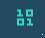
1. Under Files
2. Click Browse to upload a file from your PC
3. Locate and select the 'unique_metro_clean.csv' which was on the box folder
4. Once loaded put your cursor in the middle of the following cell 
5. Select Insert to code > Insert Pandas DataFrame 

This should insert code into the cell which populates a dataframe with the content of the file

Remember to adjust the name of the input name on the line that says 'metros_in_madrid = df_data_4'

0             Pacífico (Madrid Metro)   40.40126  -3.6751312000000005
0  1  Sierra de Guadalupe (Madrid Metro)  40.382164            -3.624719
1  2               Atocha (Madrid Metro)  40.408851            -3.692484
2  3             Portazgo (Madrid Metro)  40.392661            -3.658679
3  4               Bilbao (Madrid Metro)  40.429054            -3.702182
4  5         Antón Martín (Madrid Metro)  40.412468            -3.699369

In [40]:
# Adjust the df_data_nn of the following line to match the df_data_n.head() which was just generated
metros_in_madrid = df_data_8
#metros_in_madrid = pd.read_csv(get_object_storage_file_with_credentials_83e2982aad4a45028646908cf6f66a34('MadridHousingPrices', 'unique_metro.csv'),sep=";", header=None)
metros_in_madrid.columns = ["id","station","latitude","longitude"]
metros_in_madrid = metros_in_madrid[ metros_in_madrid["latitude"] > 39.5 ]
metros_in_madrid.head()

id                             station   latitude  longitude
0   1  Sierra de Guadalupe (Madrid Metro)  40.382164  -3.624719
1   2               Atocha (Madrid Metro)  40.408851  -3.692484
2   3             Portazgo (Madrid Metro)  40.392661  -3.658679
3   4               Bilbao (Madrid Metro)  40.429054  -3.702182
4   5         Antón Martín (Madrid Metro)  40.412468  -3.699369

In [41]:
metros_in_madrid.to_csv("metro_statiosn_madrid.csv", index=False)
client_01fa29576c1949bf8bf19f9e93a1ba4a.upload_file("metro_statiosn_madrid.csv",Bucket='madriddemocosv25a2f52851fe4426398727dbd657012ea',Key='metro_statiosn_madrid.csv' )

### Again, we can use Folium to make pretty maps of the Metro Stations in Madrid

In [42]:
import folium

map_osm = folium.Map(location=[np.mean(metros_in_madrid.latitude), np.mean(metros_in_madrid.longitude)])
for i in range(metros_in_madrid.id.count()):
    row = metros_in_madrid.iloc[i]
    folium.Marker([row.latitude, row.longitude]).add_to(map_osm)
    
map_osm

Zoom in to take a look at where the metros are.

### Determine distance from our favourite reference location to the nearest metro station
We do this by defining a function which uses the locations of all the metros, the call the functions with our favourite Cybele Palace location 

In [43]:
import geopy

from geopy.distance import great_circle

metro_location_tuples = list(zip( metros_in_madrid.latitude.values, metros_in_madrid.longitude.values ))

def distance_to_nearest_metro(lat, lng):
    global metro_location_tuples
    distance =  great_circle( (lat,lng), metro_location_tuples[0] ).km
    distances =  map(lambda ll: great_circle( (lat,lng), (ll[0],ll[1]) ).km , metro_location_tuples)
    return min(distances)

cybele_palace = (40.418906, -3.692084)

print( "The distance (KM) from Cybele Palace, to the nearest metro is {0:.2f} KM".format( distance_to_nearest_metro(*cybele_palace) ) )

The distance (KM) from Cybele Palace, to the nearest metro is 0.24 KM


### Calculating the Distance from all houses, to each metro station can take 1 minute or so. Db2 Warehouse in Cloud (formerly dashDB) can do this faster, but remember we have more capabilities in notebooks!

### Db2 Warehouse in Cloud (dashDB) has a beautiful geospatial module, which can do similar calculations with optimized code

Call the function we have created to determine distance for each property using the lat and long of each property.
This just gives us a list of distances...

In [44]:
distance_series = madrid_with_price.apply( lambda x : distance_to_nearest_metro(x.lat , x.lng) , axis=1)
distance_df = distance_series.to_frame(name="distance_to_metro")
distance_df.head(10)

distance_to_metro
0           0.169595
1           0.482296
2           0.514912
3           0.395197
4           0.589443
5           0.124450
6           0.371949
7           0.161684
8           1.695217
9           0.775873

### Feature Engineering - Make Data more colorful, reflect certain aspect more prominent in the data
If we join the results of the distance calculation with the original data we can show the distance to a metro station

In [45]:
madrid_with_metro = madrid_with_centre.join( distance_df )
madrid_with_metro.head(3)

ad_id     price  region_level2_id      lat      lng  \
0  141537319.0  550000.0              28.0  40.4040 -3.69258   
1  141129777.0   84999.0              28.0  40.4212 -3.61754   
2  141321296.0  159999.0              28.0  40.4226 -3.64750   

           create_date property property_state  district_id   mts2  \
0  22/02/2017 13:15:54     Flat       VeryGood        671.0  178.0   
1  17/01/2017 19:37:03     Flat            NaN        676.0   60.0   
2  02/02/2017 18:53:29     Flat            NaN        685.0   67.0   

         ...         piscina-comunitaria puerta-blindada  terraza  lavadora  \
0        ...                           0               0        1         0   
1        ...                           0               0        0         0   
2        ...                           0               0        0         0   

   serv-porteria zona-infantil  cocina-office  parking-comunitario  \
0              1             0              0                    0   
1              0             0              0                    0   
2              0             0              0                    0   

   distance_to_centre distance_to_metro  
0            1.707948          0.169595  
1            7.292788          0.482296  
2            4.782115          0.514912  

[3 rows x 94 columns]

### That worked, but added the distance to metro as column 92 !
Lets specify the columns we want to see !

In [46]:
madrid_with_metro[["ad_id","price","region_level2_id","lat","lng","create_date","distance_to_centre","distance_to_metro","district_id","mts2"]].head(10)

ad_id      price  region_level2_id      lat      lng  \
0  141537319.0   550000.0              28.0  40.4040 -3.69258   
1  141129777.0    84999.0              28.0  40.4212 -3.61754   
2  141321296.0   159999.0              28.0  40.4226 -3.64750   
3  142917234.0   515000.0              28.0  40.4429 -3.71124   
4  141506865.0   115000.0              28.0  40.3796 -3.73910   
5  140225189.0  1600000.0              28.0  40.4448 -3.68470   
6  142036371.0   130000.0              28.0  40.3722 -3.69819   
7  142876815.0   158000.0              28.0  40.4092 -3.70259   
8  140558214.0   630000.0              28.0  40.4560 -3.73836   
9  142479143.0  1200000.0              28.0  40.4643 -3.60705   

           create_date  distance_to_centre  distance_to_metro  district_id  \
0  22/02/2017 13:15:54            1.707948           0.169595        671.0   
1  17/01/2017 19:37:03            7.292788           0.482296        676.0   
2  02/02/2017 18:53:29            4.782115           0.514912        685.0   
3   15/06/2017 7:43:11            2.963425           0.395197        177.0   
4  20/02/2017 13:00:42            5.131716           0.589443        171.0   
5  21/10/2016 17:42:20            3.484815           0.124450        176.0   
6  03/04/2017 10:40:05            4.994175           0.371949        205.0   
7  13/06/2017 13:21:28            0.861961           0.161684        672.0   
8  23/11/2016 16:54:58            5.254880           1.695217        669.0   
9   12/05/2017 9:59:24            9.716213           0.775873        668.0   

    mts2  
0  178.0  
1   60.0  
2   67.0  
3  139.0  
4   56.0  
5  248.0  
6  117.0  
7   38.0  
8  294.0  
9  600.0

## Models  often expect the input data in a different representation than we are used to. 
Typically this might mean processing categories so that different values get stored in different columns. This is referred to as storing categories as one-hot-encoding, like tensorflow.

It tends to make the data set wide.

This step is sometimes performed by model internally.
https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science

Tensorflow likes data as one-hot encoding. And many models with no specials support for categotical values, will understand One-Hot.

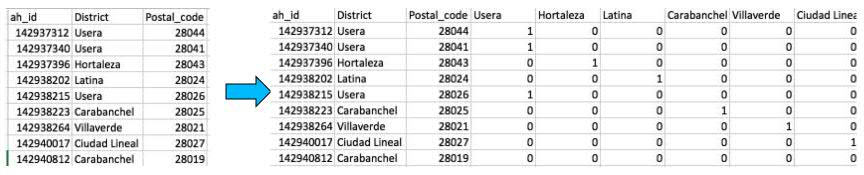


With a simple loop, we can replace categorical variables for property, property_state, and district with a column for each value. In the loop we drop the original column. 


** Used Pandas Operations **

http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.drop.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

In [47]:
COLUMNS_TO_INDEX_AS_CATEGORIES = ["property", "property_state", "district"]

In [48]:
madrid_one_hot_encoded = madrid_with_metro

for col in COLUMNS_TO_INDEX_AS_CATEGORIES:
    if col in madrid_one_hot_encoded.columns:
        temp_res = pd.get_dummies(  madrid_one_hot_encoded[ col ], prefix=col )
        madrid_one_hot_encoded[ temp_res.columns ] = temp_res
        madrid_one_hot_encoded = madrid_one_hot_encoded.drop(col, 1)

madrid_one_hot_encoded.head()

ad_id     price  region_level2_id      lat      lng  \
0  141537319.0  550000.0              28.0  40.4040 -3.69258   
1  141129777.0   84999.0              28.0  40.4212 -3.61754   
2  141321296.0  159999.0              28.0  40.4226 -3.64750   
3  142917234.0  515000.0              28.0  40.4429 -3.71124   
4  141506865.0  115000.0              28.0  40.3796 -3.73910   

           create_date  district_id   mts2  ad_publisher_type_id  \
0  22/02/2017 13:15:54        671.0  178.0                   1.0   
1  17/01/2017 19:37:03        676.0   60.0                   1.0   
2  02/02/2017 18:53:29        685.0   67.0                   1.0   
3   15/06/2017 7:43:11        177.0  139.0                   1.0   
4  20/02/2017 13:00:42        171.0   56.0                   1.0   

            county         ...          district_Moratalaz  \
0  Madrid, Zona de         ...                           0   
1  Madrid, Zona de         ...                           0   
2  Madrid, Zona de         ...                           0   
3  Madrid, Zona de         ...                           0   
4  Madrid, Zona de         ...                           0   

   district_Puente de Vallecas  district_Retiro  district_Salamanca  \
0                            0                0                   0   
1                            0                0                   0   
2                            0                0                   0   
3                            0                0                   0   
4                            0                0                   0   

   district_San Blas  district_Tetuán district_Usera district_Vicálvaro  \
0                  0                0              0                  0   
1                  1                0              0                  0   
2                  0                0              0                  0   
3                  0                0              0                  0   
4                  0                0              0                  0   

  district_Villa de Vallecas district_Villaverde  
0                          0                   0  
1                          0                   0  
2                          0                   0  
3                          0                   0  
4                          0                   0  

[5 rows x 118 columns]

In [49]:
# We now have a wider data set !
for col in madrid_one_hot_encoded.columns[1:]:
    print( col, end=", ")

price, region_level2_id, lat, lng, create_date, district_id, mts2, ad_publisher_type_id, county, rooms, water_id, heating_id, postal_code, property_state_id, county_id, country, street, region_level1, neighbourhood, city_zone, property_id, region_level1_id, list_type, city, host_name, publish_date, transaction, price_min, company, search_results_number, more_filters, sell_type_id, ad_title, neighbourhood_id, region_level2, bathrooms, city_zone_id, property_sub, site, videoportero, ascensor, bodega, patio, casa-de-invitados, horno, bano-huespedes, amueblado, z-comunitaria, gimnasio, alarma, piscina, cuarto-servicio, ascensor-interior, garaje-privado, trastero, cuarto-lavado-plancha, aire-acondicionado, parquet, porche-cubierto, jacuzzi, suite-bano, domotica, musica-ambiental, muebles-diseno, energia-solar, calefaccion, sala-cine, gres-ceramica, microondas, TV, lavadero, jardin-privado, internet, electrodomesticos, armarios, balcon, nevera, zona-deportiva, pista-tenis, sauna, piscina-com

We are not interested in all columns, so just take first 40 columns and rooms, bathrooms and mts2

In [50]:
FEATURE_FOR_MODEL = list(madrid_one_hot_encoded.columns[40:]) + ["rooms", "bathrooms","mts2"]

for feature in FEATURE_FOR_MODEL:
    print(feature, end=", ")

videoportero, ascensor, bodega, patio, casa-de-invitados, horno, bano-huespedes, amueblado, z-comunitaria, gimnasio, alarma, piscina, cuarto-servicio, ascensor-interior, garaje-privado, trastero, cuarto-lavado-plancha, aire-acondicionado, parquet, porche-cubierto, jacuzzi, suite-bano, domotica, musica-ambiental, muebles-diseno, energia-solar, calefaccion, sala-cine, gres-ceramica, microondas, TV, lavadero, jardin-privado, internet, electrodomesticos, armarios, balcon, nevera, zona-deportiva, pista-tenis, sauna, piscina-comunitaria, puerta-blindada, terraza, lavadora, serv-porteria, zona-infantil, cocina-office, parking-comunitario, distance_to_centre, distance_to_metro, property_Flat, property_state_AlmostNew, property_state_Good, property_state_Reformed, property_state_ToMakeImprovements, property_state_VeryGood, district_Arganzuela, district_Barajas, district_Carabanchel, district_Centro, district_Chamartín, district_Chamberí, district_Ciudad Lineal, district_Fuencarral, district_Hor

### Feature Engineering is just as important (or more), as creating a good model

### Optionally, change the CODE below to select features for the model to use - Normally, you would select all protential features

If you would like to use all district features, like

**district_Arganzuela, district_Barajas, district_Carabanchel, district_Centro, district_Chamartín, district_Chamberí, district_Ciudad Lineal, district_Fuencarral, district_Hortaleza, district_Latina, district_Moncloa, district_Moratalaz, district_Puente de Vallecas, district_Retiro, district_Salamanca, district_San Blas, district_Tetuán, district_Usera, district_Vicálvaro, district_Villa de Vallecas, district_Villaverde**

simply enter **`district`**, and the code will add all features containing the work district. Similar for property state

In [51]:
"""
   Edit the line below to change the features used by the model.
   
   FEATURE_SELECTION = FEATURE_FOR_MODEL will use ALL features
   
"""
SELECTED_BY_USED_FEATURES = ["distance_to_centre", "property_state", "district", "mts2", "sauna"]

FEATURE_SELECTION = []

for feature in SELECTED_BY_USED_FEATURES:
    for potential_feature in FEATURE_FOR_MODEL:
        if feature in potential_feature:
            FEATURE_SELECTION.append(potential_feature)
            
for feat in FEATURE_SELECTION:
    print(feat, end=", ")
            

distance_to_centre, property_state_AlmostNew, property_state_Good, property_state_Reformed, property_state_ToMakeImprovements, property_state_VeryGood, district_Arganzuela, district_Barajas, district_Carabanchel, district_Centro, district_Chamartín, district_Chamberí, district_Ciudad Lineal, district_Fuencarral, district_Hortaleza, district_Latina, district_Moncloa, district_Moratalaz, district_Puente de Vallecas, district_Retiro, district_Salamanca, district_San Blas, district_Tetuán, district_Usera, district_Vicálvaro, district_Villa de Vallecas, district_Villaverde, mts2, sauna, 

## Test / Train set creation

As a data scientist, if there is anough data, I will split my data into Training, Validation and Testing sets in order to tune my model.
Tuning (by adding features such as metro), and by configuring the algorithms to go into more levels of depth. 

In this example we are doing a two way split using 80:20

In [52]:
msk = np.random.rand(len(madrid_one_hot_encoded)) < 0.8

train = madrid_one_hot_encoded[msk]
test = madrid_one_hot_encoded[~msk]

## Tweak Model parameters to get an even better performance

## Can it be good to tweak number of trees, or tree complexity ?

![](http://www.iis.ee.ic.ac.uk/icvl/iccv09_tutorial_files/random_forest_new2.png)

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Having split the data, this next step uses RandomForestRegressor to make predictions. The random forest regressor will only ever predict values within the range of observations or closer to zero. 
We will run this against the training set, looking at price.

In [53]:
from sklearn.ensemble import RandomForestRegressor

"""
    Change the code below, to make the model perform better, and use all information from data as best as possible
"""
clf = RandomForestRegressor(max_depth=25, n_estimators=5)

target_t = train[ "price" ]
features_t = train[ FEATURE_SELECTION ]

clf.fit(  features_t, target_t )

features_t.head()

distance_to_centre  property_state_AlmostNew  property_state_Good  \
0            1.707948                         0                    0   
1            7.292788                         0                    0   
2            4.782115                         0                    0   
3            2.963425                         0                    1   
4            5.131716                         0                    0   

   property_state_Reformed  property_state_ToMakeImprovements  \
0                        0                                  0   
1                        0                                  0   
2                        0                                  0   
3                        0                                  0   
4                        0                                  0   

   property_state_VeryGood  district_Arganzuela  district_Barajas  \
0                        1                    1                 0   
1                        0                    0                 0   
2                        0                    0                 0   
3                        0                    0                 0   
4                        0                    0                 0   

   district_Carabanchel  district_Centro  ...    district_Retiro  \
0                     0                0  ...                  0   
1                     0                0  ...                  0   
2                     0                0  ...                  0   
3                     0                0  ...                  0   
4                     1                0  ...                  0   

   district_Salamanca  district_San Blas  district_Tetuán  district_Usera  \
0                   0                  0                0               0   
1                   0                  1                0               0   
2                   0                  0                0               0   
3                   0                  0                0               0   
4                   0                  0                0               0   

   district_Vicálvaro  district_Villa de Vallecas  district_Villaverde   mts2  \
0                   0                           0                    0  178.0   
1                   0                           0                    0   60.0   
2                   0                           0                    0   67.0   
3                   0                           0                    0  139.0   
4                   0                           0                    0   56.0   

   sauna  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 29 columns]

### The following cell attempts to identify features which influence the property price

In [54]:
feature_imp_dict = {}
importance_list = []
for (imp, label) in list( zip( list(clf.feature_importances_), FEATURE_SELECTION ) ):
    feature_imp_dict[label] = imp
    importance_list.append(imp)

treshold = sorted(importance_list)[-10] 
important_features = {}

for key in feature_imp_dict:
    if feature_imp_dict[key] >= treshold:
        important_features[key] = feature_imp_dict[key]
        
for k,v in sorted(important_features.items(), key=lambda x:-x[1]):
    print(k, v)


mts2 0.817655494088
distance_to_centre 0.115088494705
district_Chamartín 0.0136625637723
district_Salamanca 0.00805479288711
property_state_AlmostNew 0.00611390471168
property_state_ToMakeImprovements 0.00553359490603
property_state_VeryGood 0.00494192262301
property_state_Good 0.00479123448886
district_Hortaleza 0.00293210137547
district_Usera 0.00276602664707


### Here we see that the sq.metre is the largest indicator of price, with distance to city centre.

Now lets plot this importance of these features....

([<matplotlib.axis.XTick at 0x7fe3ad3d80f0>,
 <a list of 10 Text xticklabel objects>)

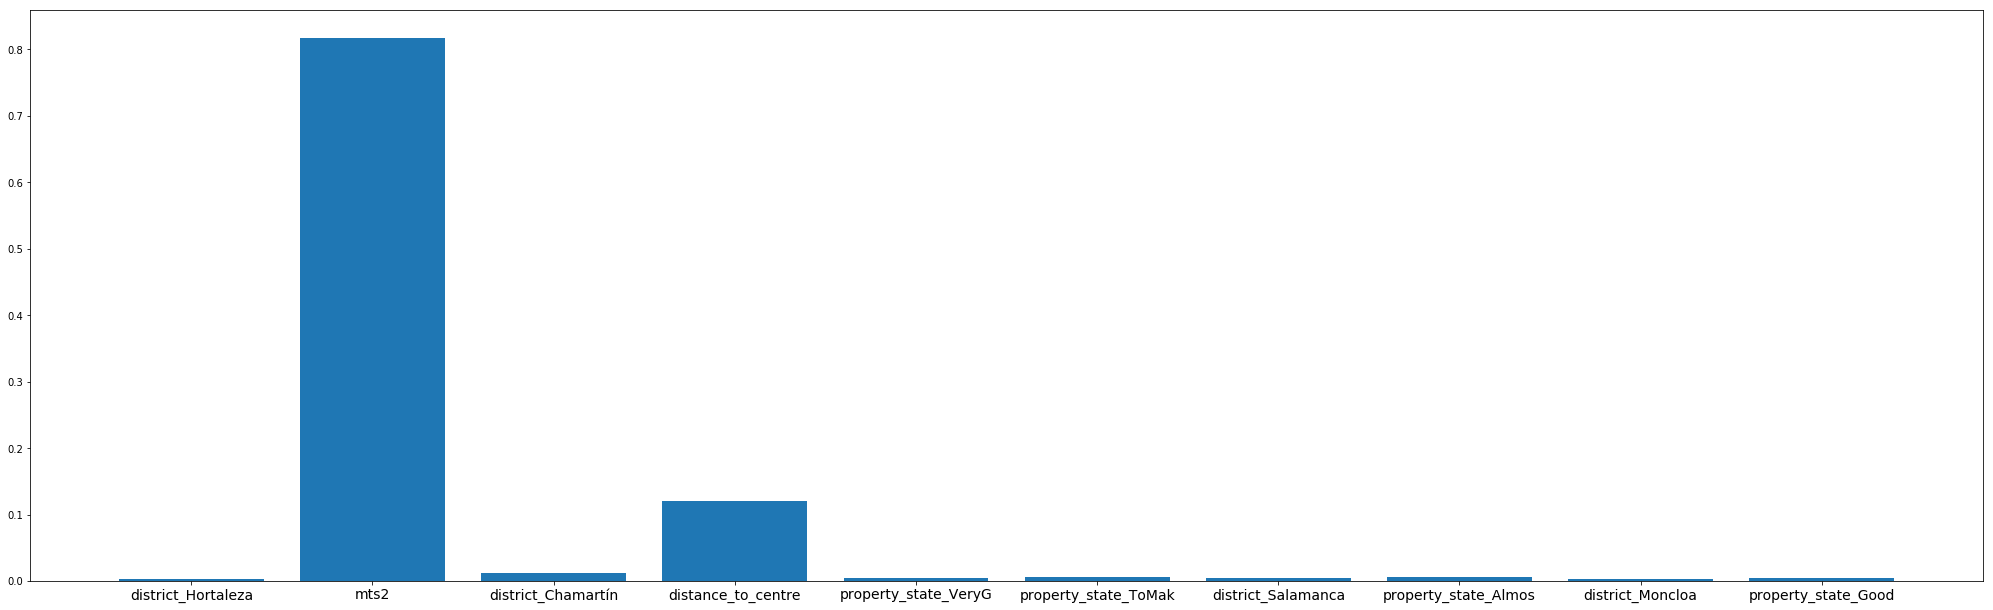

In [53]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

dictionary = plt.figure()
dictionary.set_size_inches(35, 10.5)

D = important_features

keys = [ s[:20] for s in D.keys()]

plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(fontsize=14)  
plt.xticks(range(len(D)), keys)

So based on our training set **mts2** (metre.sq), **distance_to_centre** are important features.

## Test model performance on Test set (unseen during model training)

In [54]:
preds = clf.predict(test[ FEATURE_SELECTION ])
performance = percentage_quite_well_predicted(test.price.tolist(),  [ val for val in preds]  )

print("{0:.2f}% is well predicted".format(100 * performance))

36.64% is well predicted


By using more colorful features, and a more advanced more, we boosted our performance from around 7, to 20%

In [55]:
price_predictions = pd.DataFrame(preds,columns=["predicted_price"])

In [56]:
matrid_with_predictions = madrid_one_hot_encoded.join( price_predictions )
matrid_with_predictions.head(5)

ad_id     price  region_level2_id      lat      lng  \
0  141537319.0  550000.0              28.0  40.4040 -3.69258   
1  141129777.0   84999.0              28.0  40.4212 -3.61754   
2  141321296.0  159999.0              28.0  40.4226 -3.64750   
3  142917234.0  515000.0              28.0  40.4429 -3.71124   
4  141506865.0  115000.0              28.0  40.3796 -3.73910   

           create_date  district_id   mts2  ad_publisher_type_id  \
0  22/02/2017 13:15:54        671.0  178.0                   1.0   
1  17/01/2017 19:37:03        676.0   60.0                   1.0   
2  02/02/2017 18:53:29        685.0   67.0                   1.0   
3   15/06/2017 7:43:11        177.0  139.0                   1.0   
4  20/02/2017 13:00:42        171.0   56.0                   1.0   

            county       ...        district_Puente de Vallecas  \
0  Madrid, Zona de       ...                                  0   
1  Madrid, Zona de       ...                                  0   
2  Madrid, Zona de       ...                                  0   
3  Madrid, Zona de       ...                                  0   
4  Madrid, Zona de       ...                                  0   

   district_Retiro  district_Salamanca  district_San Blas  district_Tetuán  \
0                0                   0                  0                0   
1                0                   0                  1                0   
2                0                   0                  0                0   
3                0                   0                  0                0   
4                0                   0                  0                0   

   district_Usera district_Vicálvaro district_Villa de Vallecas  \
0               0                  0                          0   
1               0                  0                          0   
2               0                  0                          0   
3               0                  0                          0   
4               0                  0                          0   

  district_Villaverde predicted_price  
0                   0    1.522000e+05  
1                   0    1.305000e+06  
2                   0    1.989457e+05  
3                   0    1.310000e+06  
4                   0    9.927499e+04  

[5 rows x 119 columns]

In [57]:
price_difference = pd.DataFrame( matrid_with_predictions["price"] - matrid_with_predictions["predicted_price"], columns=["difference_with_prediction"] )

In [58]:
matrid_with_predictions_and_difference = matrid_with_predictions.join( price_difference )
matrid_with_predictions_and_difference.head(5)

ad_id     price  region_level2_id      lat      lng  \
0  141537319.0  550000.0              28.0  40.4040 -3.69258   
1  141129777.0   84999.0              28.0  40.4212 -3.61754   
2  141321296.0  159999.0              28.0  40.4226 -3.64750   
3  142917234.0  515000.0              28.0  40.4429 -3.71124   
4  141506865.0  115000.0              28.0  40.3796 -3.73910   

           create_date  district_id   mts2  ad_publisher_type_id  \
0  22/02/2017 13:15:54        671.0  178.0                   1.0   
1  17/01/2017 19:37:03        676.0   60.0                   1.0   
2  02/02/2017 18:53:29        685.0   67.0                   1.0   
3   15/06/2017 7:43:11        177.0  139.0                   1.0   
4  20/02/2017 13:00:42        171.0   56.0                   1.0   

            county            ...              district_Retiro  \
0  Madrid, Zona de            ...                            0   
1  Madrid, Zona de            ...                            0   
2  Madrid, Zona de            ...                            0   
3  Madrid, Zona de            ...                            0   
4  Madrid, Zona de            ...                            0   

   district_Salamanca  district_San Blas  district_Tetuán  district_Usera  \
0                   0                  0                0               0   
1                   0                  1                0               0   
2                   0                  0                0               0   
3                   0                  0                0               0   
4                   0                  0                0               0   

   district_Vicálvaro district_Villa de Vallecas district_Villaverde  \
0                   0                          0                   0   
1                   0                          0                   0   
2                   0                          0                   0   
3                   0                          0                   0   
4                   0                          0                   0   

  predicted_price difference_with_prediction  
0    1.522000e+05               3.978000e+05  
1    1.305000e+06              -1.220001e+06  
2    1.989457e+05              -3.894671e+04  
3    1.310000e+06              -7.950000e+05  
4    9.927499e+04               1.572501e+04  

[5 rows x 120 columns]

### What properties are lower than our predicted price? Those might be good houses to buy, because our model thinks they should be more expensive

Here is the top 5. Notice a lot of the top 5, is far away from the center, but close to a metro.

In [59]:
COL_SHOW = ["ad_id","price","predicted_price","difference_with_prediction","distance_to_centre","distance_to_metro","district_id","mts2"]
matrid_with_predictions_and_difference.sort_values("difference_with_prediction")[COL_SHOW].head(20)

ad_id      price  predicted_price  difference_with_prediction  \
2565  142796373.0   102033.0     8.700000e+06               -8.597967e+06   
648   142663657.0   199000.0     7.980000e+06               -7.781000e+06   
1107  142731995.0   285000.0     5.940000e+06               -5.655000e+06   
2725  142375957.0   127000.0     5.100000e+06               -4.973000e+06   
2516  142837838.0  1190000.0     5.940000e+06               -4.750000e+06   
1211  142706435.0   160000.0     4.900000e+06               -4.740000e+06   
1544  140476001.0   850000.0     5.460000e+06               -4.610000e+06   
1617  141513106.0   675000.0     4.597333e+06               -3.922333e+06   
3139  142100474.0   399000.0     4.320000e+06               -3.921000e+06   
791   142843102.0   200000.0     4.000000e+06               -3.800000e+06   
1799  141371671.0   699000.0     4.433167e+06               -3.734167e+06   
2044  142826424.0   154000.0     3.860000e+06               -3.706000e+06   
2145  139705303.0   977000.0     4.670000e+06               -3.693000e+06   
1863  141342470.0   184000.0     3.872000e+06               -3.688000e+06   
2763  142314635.0   255000.0     3.830000e+06               -3.575000e+06   
1317  142358106.0   960000.0     4.460000e+06               -3.500000e+06   
2139  142106183.0    85500.0     3.526333e+06               -3.440833e+06   
798   142072417.0   165000.0     3.500000e+06               -3.335000e+06   
2740  136312215.0   280000.0     3.480000e+06               -3.200000e+06   
458   140834586.0   820000.0     3.995000e+06               -3.175000e+06   

      distance_to_centre  distance_to_metro  district_id   mts2  
2565            3.116596           0.213177        205.0   74.0  
648             3.808275           0.451506        667.0   70.0  
1107            1.024333           0.095738        672.0   91.0  
2725            7.069304           0.562014        187.0   55.0  
2516            1.024333           0.095738        672.0  189.0  
1211            3.896131           0.552334        681.0   55.0  
1544            5.527604           0.195439        176.0  196.0  
1617            1.739846           0.326616        669.0  155.0  
3139            2.886646           0.306428        177.0   70.0  
791             3.896131           0.552334        681.0   45.0  
1799            0.102367           0.099681        672.0   95.0  
2044            3.972853           0.436073        681.0   56.0  
2145            8.789061           0.363482        187.0  295.0  
1863            1.798993           0.394194        671.0   46.0  
2763            0.949273           0.147066        672.0   67.0  
1317            1.739846           0.326616        669.0  170.0  
2139            8.826211           0.142426        209.0   75.0  
798             0.918118           0.509545        672.0   45.0  
2740            4.782115           0.514912        685.0   90.0  
458             2.886831           0.304702        667.0  173.0

In [60]:
import sklearn
print( sklearn.__version__ )

#!pip install --upgrade sklearn


0.19.1


In [61]:
from sklearn.ensemble import IsolationForest

iso_mod = IsolationForest()

In [62]:
for_ano = madrid_one_hot_encoded[FEATURE_FOR_MODEL]

In [63]:
iso_mod.fit(for_ano)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [64]:
result = iso_mod.decision_function(for_ano)

ANOMALIES_IN_MADRID = [ index for (index,ano) in enumerate(result.tolist()) if ano < -0.15 ]

result

array([ 0.10213594,  0.14480684,  0.13522722, ..., -0.03387554,
        0.08315056,  0.04833954])

In [65]:
madrid_one_hot_encoded.join( pd.Series(result).to_frame(name="anomaly_index") ).sort_values("anomaly_index")

ad_id      price  region_level2_id      lat      lng  \
12338  142985023.0   250000.0              28.0  40.3971 -3.68648   
8520   141056751.0   141750.0              28.0  40.4052 -3.64206   
3254   142465468.0   160200.0              28.0  40.4248 -3.66369   
5635   142665406.0   395000.0              28.0  40.4237 -3.69667   
11709  142877163.0   165000.0              28.0  40.3901 -3.66794   
7389   141464163.0   180000.0              28.0  40.4442 -3.66917   
14157  142737589.0   179900.0              28.0  40.4096 -3.73215   
7682   142253315.0   440000.0              28.0  40.4784 -3.72466   
4814   140030415.0    73000.0              28.0  40.4725 -3.64695   
15322  142688870.0   150000.0              28.0  40.4455 -3.57015   
11699  140327478.0   310000.0              28.0  40.4370 -3.64504   
7243   142859797.0  1250000.0              28.0  40.4627 -3.67807   
11769  142018210.0   445000.0              28.0  40.4507 -3.65626   
9551   120106947.0   275000.0              28.0  40.3370 -3.67620   
10430  142766944.0   379999.0              28.0  40.4779 -3.70818   
6914   142628970.0   225000.0              28.0  40.3902 -3.72179   
11137  140724749.0  1500000.0              28.0  40.4557 -3.63498   
13580  139392003.0  1200000.0              28.0  40.4148 -3.69677   
15864  142975909.0   153000.0              28.0  40.3817 -3.77107   
6970   140845297.0  1900000.0              28.0  40.4557 -3.63498   
5150   142677904.0   216000.0              28.0  40.3722 -3.69819   
4929   138813549.0   590000.0              28.0  40.4364 -3.66649   
2753   142068596.0  3000000.0              28.0  40.4697 -3.82109   
4600   142240863.0   330000.0              28.0  40.4681 -3.77892   
11048  142903912.0    68750.0              28.0  40.3905 -3.64810   
14865  142982557.0  1300000.0              28.0  40.4281 -3.71785   
8368   141734397.0   560000.0              28.0  40.4320 -3.67573   
8006   142001509.0  1200000.0              28.0  40.4442 -3.66917   
14596  142763545.0   250000.0              28.0  40.4638 -3.64358   
764    142229972.0   135000.0              28.0  40.3843 -3.74578   
...            ...        ...               ...      ...      ...   
18994  142970296.0  1090000.0              28.0  40.3696 -3.74229   
18995  142640909.0   440000.0              28.0  40.4257 -3.70713   
18996  142605140.0  1175000.0              28.0  40.4329 -3.69355   
18997  142553150.0   475000.0              28.0  40.4141 -3.66544   
18998  142767466.0   104400.0              28.0  40.4022 -3.75034   
18999  140392543.0  2400000.0              28.0  40.4247 -3.68578   
19000  142788003.0   410000.0              28.0  40.3414 -3.70904   
19001  141890050.0  2500000.0              28.0  40.4627 -3.67807   
19002  142054074.0   695000.0              28.0  40.4448 -3.68470   
19005  141997873.0   135000.0              28.0  40.4010 -3.67110   
19006  141316507.0   247000.0              28.0  40.4670 -3.70414   
19007  142983032.0    88000.0              28.0  40.3901 -3.66794   
19008  140424610.0   144000.0              28.0  40.4013 -3.64658   
19010  142653216.0   530000.0              28.0  40.4173 -3.70458   
19012  142607138.0   299000.0              28.0  40.4141 -3.66544   
19013  141732983.0   257000.0              28.0  40.4040 -3.69258   
19014  142931804.0   373500.0              28.0  40.4483 -3.67298   
19015  141230764.0   355000.0              28.0  40.4364 -3.66649   
19016  139638610.0   109900.0              28.0  40.3684 -3.64736   
19017  142916177.0    90000.0              28.0  40.3748 -3.67302   
19019  142915641.0  1095000.0              28.0  40.4425 -3.69772   
19023  142353359.0   875000.0              28.0  40.4329 -3.70114   
19024  142984079.0   670000.0              28.0  40.4808 -3.74245   
19025  139151380.0   120000.0              28.0  40.3995 -3.65851   
19026  140005130.0   400000.0              28.0  40.4062 -3.71859   
19028  142474401.0   175000.0              28.0  40.3705 -3.68896   
19029  1429

![anomaly](http://i.imgur.com/TnTuflX.png)

In [72]:
filterd_on_price = madrid_one_hot_encoded[ madrid_one_hot_encoded["price"] > 50000 ]
filtered_on_area = filterd_on_price[filterd_on_price["mts2"] > 10 ]
houses = filtered_on_area
houses.head()

ad_id     price  region_level2_id      lat      lng  \
0  141537319.0  550000.0              28.0  40.4040 -3.69258   
1  141129777.0   84999.0              28.0  40.4212 -3.61754   
2  141321296.0  159999.0              28.0  40.4226 -3.64750   
3  142917234.0  515000.0              28.0  40.4429 -3.71124   
4  141506865.0  115000.0              28.0  40.3796 -3.73910   

           create_date  district_id   mts2  ad_publisher_type_id  \
0  22/02/2017 13:15:54        671.0  178.0                   1.0   
1  17/01/2017 19:37:03        676.0   60.0                   1.0   
2  02/02/2017 18:53:29        685.0   67.0                   1.0   
3   15/06/2017 7:43:11        177.0  139.0                   1.0   
4  20/02/2017 13:00:42        171.0   56.0                   1.0   

            county         ...          district_Moratalaz  \
0  Madrid, Zona de         ...                           0   
1  Madrid, Zona de         ...                           0   
2  Madrid, Zona de         ...                           0   
3  Madrid, Zona de         ...                           0   
4  Madrid, Zona de         ...                           0   

   district_Puente de Vallecas  district_Retiro  district_Salamanca  \
0                            0                0                   0   
1                            0                0                   0   
2                            0                0                   0   
3                            0                0                   0   
4                            0                0                   0   

   district_San Blas  district_Tetuán district_Usera district_Vicálvaro  \
0                  0                0              0                  0   
1                  1                0              0                  0   
2                  0                0              0                  0   
3                  0                0              0                  0   
4                  0                0              0                  0   

  district_Villa de Vallecas district_Villaverde  
0                          0                   0  
1                          0                   0  
2                          0                   0  
3                          0                   0  
4                          0                   0  

[5 rows x 118 columns]

In [73]:
import xgboost

In [74]:
houses_feature_engineered = filtered_on_area

X = houses_feature_engineered[ ['mts2', 'rooms', 'distance_to_centre', 'sauna'] ]
y = houses_feature_engineered[ ["price"] ]

In [75]:
from sklearn.cross_validation import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [76]:
from xgboost.sklearn import XGBClassifier, XGBRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score, mean_absolute_error

from xgboost import plot_importance
from matplotlib import pyplot

import pprint

In [77]:

pipeline = Pipeline([('scaler', StandardScaler()), ('regressor', XGBRegressor(n_estimators=10, learning_rate=0.2))])
pipeline

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))])

In [78]:
pipeline.fit(X_train.values, y_train.values)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))])

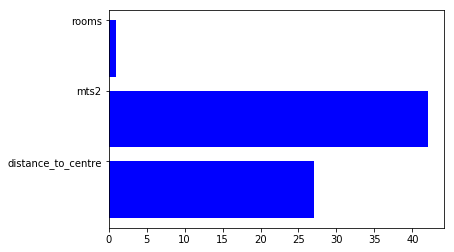

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

labels_of_columns = list(X.columns)
xgbooster_of_fit = pipeline.steps[1][1].booster()
feature_scores = xgbooster_of_fit.get_fscore()
labels,feat_importance = zip(*[ (labels_of_columns[int(k[1:])],imp) for (k,imp) in feature_scores.items() ])

fig, ax = plt.subplots()

y_ticks = np.array(range(len(feat_importance)))
width=.8

ax.barh(y_ticks, feat_importance, color="blue")
ax.set_yticklabels(labels)
ax.set_yticks(y_ticks + width / 2)
plt.show()

In [80]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient


In [82]:
client = WatsonMachineLearningAPIClient(wml_credentials)


In [83]:

model_props = {client.repository.ModelMetaNames.NAME: "XGBoost for madrid house prices"}
model_details = client.repository.store_model(pipeline, model_props)

In [84]:
client.repository.list_models()

------------------------------------  -------------------------------------------  ------------------------  -----------------
GUID                                  NAME                                         CREATED                   FRAMEWORK
ae3d2538-a972-43b1-9c56-208386def3d1  XGBoost for madrid house prices              2019-04-01T08:52:29.391Z  scikit-learn-0.19
583afbd9-4a8f-412b-aca6-41970b7030f3  credit-risk                                  2019-03-25T14:06:27.434Z  mllib-2.3
5b8da3d6-94a4-4e44-a72d-c27eef86bd9e  XGBoost for madrid house prices              2018-10-09T14:03:36.595Z  scikit-learn-0.19
167ec341-cdb9-4e0b-867b-bb12fdd65553  XGBoost for madrid house prices              2018-10-09T14:00:48.688Z  scikit-learn-0.19
6ec590de-2f17-4ad4-bc03-5585609c3967  XGBoost for madrid house prices              2018-10-09T13:59:45.159Z  scikit-learn-0.19
8eec07ff-e421-4660-a4bf-16623a8cfc05  XGBoost - example of model deployment        2018-08-29T11:01:22.057Z  scikit-learn-0.19


In [85]:
# Extract the uid.
model_uid = client.repository.get_model_uid(model_details)
print(model_uid)

ae3d2538-a972-43b1-9c56-208386def3d1


In [ ]:
deployment_details = client.deployments.create(model_uid, 'XGBoost for madrid house prices')

In [87]:
client.deployments.list()

------------------------------------  -------------------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                             TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
5fcd8719-d956-4276-9038-b4204f3a8464  car prices prediction            online  DEPLOY_SUCCESS  2018-06-04T12:05:36.366Z  scikit-learn-0.19  model
1057bdc0-9915-4dd5-bcaf-f489135cb449  XGBoost for madrid house prices  online  DEPLOY_SUCCESS  2018-05-15T08:46:03.459Z  scikit-learn-0.19  model
259e89ac-b7d5-46d9-83a4-2ad3a421d9b3  XGBoost for madrid house prices  online  DEPLOY_SUCCESS  2018-05-14T20:11:44.680Z  scikit-learn-0.19  model
f3da7d92-c43f-4fd6-b986-b973d8b6f188  XGBoost for madrid house prices  online  DEPLOY_SUCCESS  2018-05-14T20:10:05.524Z  scikit-learn-0.19  model
1fde8fcc-7321-4d04-8e22-f6ebe313140d  Predict breast cancer            online  DEPLOY_SUCCESS  2018-05-14T12

In [ ]:
# Extract endpoint url and display it.
scoring_url = client.deployments.get_scoring_url(deployment_details)
print(scoring_url)

In [89]:

# Prepare scoring payload.
payload_scoring = {"values": [[100,2,0.1,0]]}
print(payload_scoring)

{'values': [[100, 2, 0.1, 0]]}


In [ ]:

# Perform prediction and display the result.
response_scoring = client.deployments.score(scoring_url, payload_scoring)
print(response_scoring)

In [91]:
client.repository.list_models()

------------------------------------  -------------------------------------------  ------------------------  -----------------
GUID                                  NAME                                         CREATED                   FRAMEWORK
ae3d2538-a972-43b1-9c56-208386def3d1  XGBoost for madrid house prices              2019-04-01T08:52:29.391Z  scikit-learn-0.19
583afbd9-4a8f-412b-aca6-41970b7030f3  credit-risk                                  2019-03-25T14:06:27.434Z  mllib-2.3
5b8da3d6-94a4-4e44-a72d-c27eef86bd9e  XGBoost for madrid house prices              2018-10-09T14:03:36.595Z  scikit-learn-0.19
167ec341-cdb9-4e0b-867b-bb12fdd65553  XGBoost for madrid house prices              2018-10-09T14:00:48.688Z  scikit-learn-0.19
6ec590de-2f17-4ad4-bc03-5585609c3967  XGBoost for madrid house prices              2018-10-09T13:59:45.159Z  scikit-learn-0.19
8eec07ff-e421-4660-a4bf-16623a8cfc05  XGBoost - example of model deployment        2018-08-29T11:01:22.057Z  scikit-learn-0.19
